# Supervised Machine Learning - Regression Analysis

### Contents:

#### 01. Importing Libraries and Data
#### 02. Data Cleaning
#### 03. Data Preparation for Regression Analysis
#### 04. Regression Analysis

## 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Define path for importing the data

path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Advanced Analytics and Dashboard Design\Acheivement 6'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hrrp_hgi_hvbp_1.csv'))

## 02. Data Cleaning

In [6]:
# Checkd dataframe

In [7]:
df.head(5)

,Facility ID,Facility Name,State,Address,City/Town,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,Emergency Services,Promotes Interoperability of EHRs,Birthing Friendly Facility,Hospital Overall Rating,Measure Name,Excess Readmission Ratio,Observed Readmission Rate,Expected Readmission Rate,Excess Readmissions Threshold,Count of Facility MORT Measures,MORT Measures Better,MORT Measures Worse,Count of Facility Safety Measures,Safety Measures Better,Safety Measures Worse,Count of Facility READM Measures,READM Measures Better,READM Measures Worse,MORT-30-AMI Benchmark,MORT-30-AMI Performance Rate,AMI Normative Performance Index,AMI Performance Comparison,MORT-30-HF Benchmark,MORT-30-HF Performance Rate,HF Normative Performance Index,HF Performance Comparison,MORT-30-PN Benchmark,MORT-30-PN Performance Rate,PN Normative Performance Index,PN Performance Comparison,MORT-30-COPD Benchmark,MORT-30-COPD Performance Rate,COPD Normative Performance Index,COPD Performance Comparison,Excess Readmission Comparison
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-HIP-KNEE-HRRP,0.8916,3.5325,3.9618,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Low Excess Readmissions
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-HF-HRRP,1.1003,23.1263,21.0184,Above Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,High Excess Readmissions
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-AMI-HRRP,0.9332,12.9044,13.8283,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Low Excess Readmissions
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-PN-HRRP,0.9871,17.0529,17.2762,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Average Excess Readmissions
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-CABG-HRRP,0.9517,9.8131,10.3112,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Average Excess Readmissions


In [8]:
# Check shape

df.shape

(10344, 45)

In [9]:
# Check for missing values

df.isnull().sum()

Facility ID                          0
Facility Name                        0
State                                0
Address                              0
City/Town                            0
ZIP Code                             0
County/Parish                        0
Telephone Number                     0
Hospital Type                        0
Hospital Ownership                   0
Emergency Services                   0
Promotes Interoperability of EHRs    0
Birthing Friendly Facility           0
Hospital Overall Rating              0
Measure Name                         0
Excess Readmission Ratio             0
Observed Readmission Rate            0
Expected Readmission Rate            0
Excess Readmissions Threshold        0
Count of Facility MORT Measures      0
MORT Measures Better                 0
MORT Measures Worse                  0
Count of Facility Safety Measures    0
Safety Measures Better               0
Safety Measures Worse                0
Count of Facility READM M

In [10]:
# Check for duplicates

dups = df.duplicated()
dups.shape # Lack of column means no dupes

(10344,)

<Axes: xlabel='Excess Readmission Ratio', ylabel='Count'>

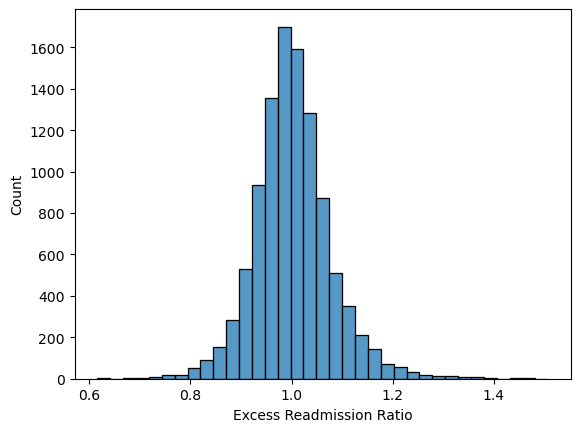

In [11]:
# Check for extreme values

sns.histplot(df['Excess Readmission Ratio'], bins=35)

In [12]:
# Check the mean

df['Excess Readmission Ratio'].mean() 

1.0027920726991493

In [13]:
# Check the median

df['Excess Readmission Ratio'].median()

0.9984

In [14]:
# Check the max

df['Excess Readmission Ratio'].max()

1.5076

In [15]:
# Check the min

df['Excess Readmission Ratio'].min()

0.6159

## 03. Data Preparation for Regression Analysis

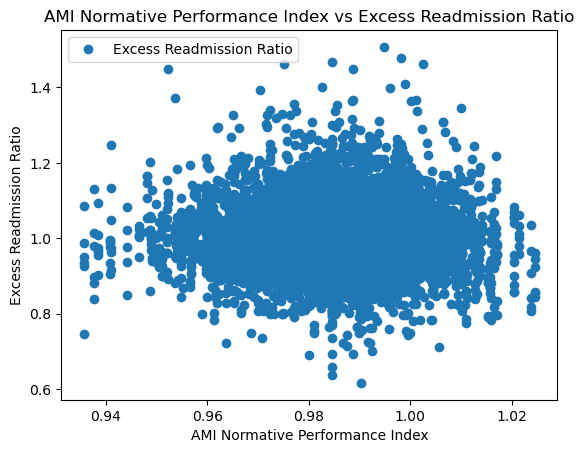

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x='AMI Normative Performance Index', y='Excess Readmission Ratio',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('AMI Normative Performance Index vs Excess Readmission Ratio')  
plt.xlabel('AMI Normative Performance Index')  
plt.ylabel('Excess Readmission Ratio')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['AMI Normative Performance Index'].values.reshape(-1,1)
y = df['Excess Readmission Ratio'].values.reshape(-1,1)

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression analysis

In [19]:
# Create a regression object.

regression_1 = LinearRegression()

In [20]:
# Fit the regression object onto the training set.

regression_1.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted_test = regression_1.predict(X_test)

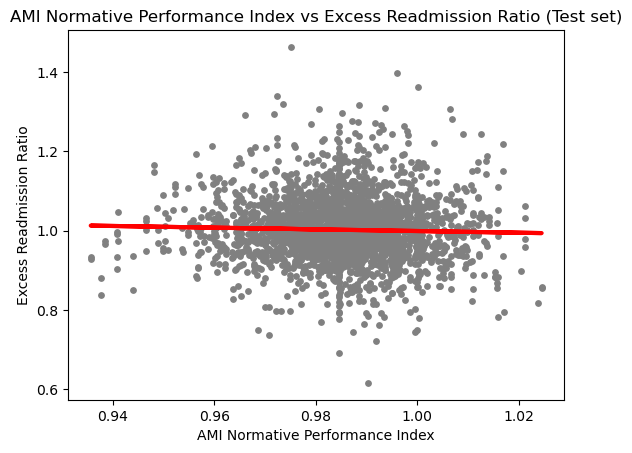

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_test, y_test, color='gray', s = 15)
plot_test_1.plot(X_test, y_predicted_test, color='red', linewidth =3)
plot_test_1.title('AMI Normative Performance Index vs Excess Readmission Ratio (Test set)')
plot_test_1.xlabel('AMI Normative Performance Index')
plot_test_1.ylabel('Excess Readmission Ratio')
plot_test_1.show()

In [23]:
# Create objects that contain the model summary statistics.

rmse_1 = mean_squared_error(y_test, y_predicted_test) 
r2_1 = r2_score(y_test, y_predicted_test)

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[-0.21271406]]
Mean squared error:  0.00589076364999995
R2 score:  0.00031819998080839795


In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted_test.flatten()})
data.head(30)

,Actual,Predicted
0,0.9858,1.006627
1,1.0358,1.003182
2,0.9584,1.002749
3,1.0165,0.998908
4,0.9787,1.002670
5,1.0121,1.006317
6,0.8841,1.001336
7,0.9871,1.005220
8,0.9516,1.003043
9,1.0378,1.001178


>**Interpretation**
>
>The regression line has a very small negative slope, appearing almost completely straight, but it does show a slight downward trend. This means that when hospitals have higher AMI (Acute Myocardial Infarction) Performance ratios, they tend to have lower excess readmission ratios. In simpler terms, hospitals that perform better in handling AMIs tend to have fewer excess readmissions compared to their peers.
>
> This is an interesting finding, as one might naturally expect that as a hospital's performance metrics increase, it would lead to better patient outcomes and therefore lower excess readmission rates. However, given that the line is almost straight and there is a significant cluster of data points, this suggests that the linear relationship is very weak. It is more likely than not that other confounding factors, if any, are at play with the model fit.
>
> Additionally, given that the points are really close together, the RMSE (Root Mean Squared Error) of 0.00589 seems a bit high. This high RMSE indicates that the model's predictions are not very accurate. This is further supported by the R-squared value of 0.000318, which denotes that the line is a poor fit for the data.
>
> The R-squared value being so close to zero suggests that the linear regression model explains almost none of the variability in the response variable. This implies that other factors, not captured by this simple linear model, are likely influencing the relationship between AMI performance ratios and excess readmission ratios. Further investigation and more complex modeling may be needed to better understand the dynamics at play.

#### Compare how the regression fits the trainning set:

In [26]:
# Predict using X_train

y_predicted_train = regression_1.predict(X_train)

In [27]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y_train, y_predicted_train)
r2_2= r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[-0.21271406]]
Mean squared error:  0.005901549095241915
R2 score:  0.001007228533992599


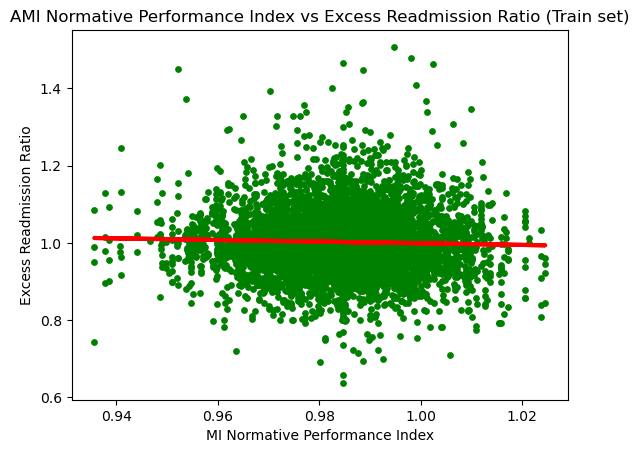

In [29]:
# Visualizing the training set results.

plot_test_2 = plt
plot_test_2.scatter(X_train, y_train, color='green', s = 15)
plot_test_2.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test_2.title('AMI Normative Performance Index vs Excess Readmission Ratio (Train set)')
plot_test_2.xlabel('MI Normative Performance Index')
plot_test_2.ylabel('Excess Readmission Ratio')
plot_test_2.show()

>**Interpretation**
>
>Considering that the R-squared score is significantly higher on the training set, it suggests that the model may have overfitted to the training data. However, despite the training set visualization looking very similar to the test set, this overfitting seems somewhat negligible. This is largely due to the model's poor fit to both the test and training sets, characterized by a large cluster of values and an almost flat line indicating a minimal slope.
>
> The visual similarity between the training and test sets can mislead, as the model's inability to capture the relationship effectively across both sets suggests that other factors, beyond those considered by the current model, are influencing the data. It's important to note that this discrepancy is not indicative of bias in the model; rather, it highlights the complex and potentially nonlinear nature of the relationship between the variables.
>
> This underscores the need for more nuanced modeling approaches to better capture the underlying dynamics and improve predictive accuracy across different datasets.